## Detecting Cyber Attacks using machine learning

* To improve cyber security, machine learning algorithms can be implemented to detect cyber attacks.
* The approach involves analyzing network data to identify potential attacks by identifying correlations between various variables. 
* By leveraging machine learning algorithms, the accuracy and efficiency of cyber attack detection can be improved. It will enhance the security of digital networks and systems.

## Cyber attack data

* The data is collected by the University of New South Wales (Australia). That includes records of different types of cyber attacks. The dataset contains network packets captured in the Cyber Range Lab of UNSW Canberra. The data is provided in two sets of training and testing data.

* The dataset includes nine types of attacks, including:

1. Fuzzers: Attack that involves sending random data to a system to test its resilience and identify any vulnerabilities.

2. Analysis: A type of attack that involves analyzing the system to identify its weaknesses and potential targets for exploitation.

3. Backdoors: Attack that involves creating a hidden entry point into a system for later use by the attacker.

4. DoS (Denial of Service): Attack that aims to disrupt the normal functioning of a system, making it unavailable to its users.

5. Exploits: Attack that leverages a vulnerability in a system to gain unauthorized access or control.

6. Generic: A catch-all category that includes a variety of different attack types that do not fit into the other categories.

7. Reconnaissance: Attack that involves gathering information about a target system, such as its vulnerabilities and potential entry points, in preparation for a future attack.

8. Shellcode: Attack that involves executing malicious code, typically in the form of shell scripts, on a target system.

9. Worms: A type of malware that spreads itself automatically to other systems, often causing harm in the process.

* These nine categories cover a wide range of attack types that can be used to exploit a system, and it is important to be aware of them to protect against potential security threats.

## Installing Libraries

In [1]:
!pip install nbformat

In [2]:
!pip install graphviz

In [3]:
!pip install dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.9/320.9 kB 25.5 MB/s eta 0:00:00


In [4]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

import dtreeviz

## Data Preparation

In [5]:
training = pd.read_csv("/kaggle/input/unsw-nb15/UNSW_NB15_training-set.csv")
testing = pd.read_csv("/kaggle/input/unsw-nb15/UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [6]:
all(training.columns == testing.columns)

True

In [7]:
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [8]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [10]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

## Categorical data

In [11]:
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    
df['attack_cat'] = df['attack_cat'].astype('category')

In [12]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


## Visualizing attacks categories

Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: attack_cat, dtype: int64


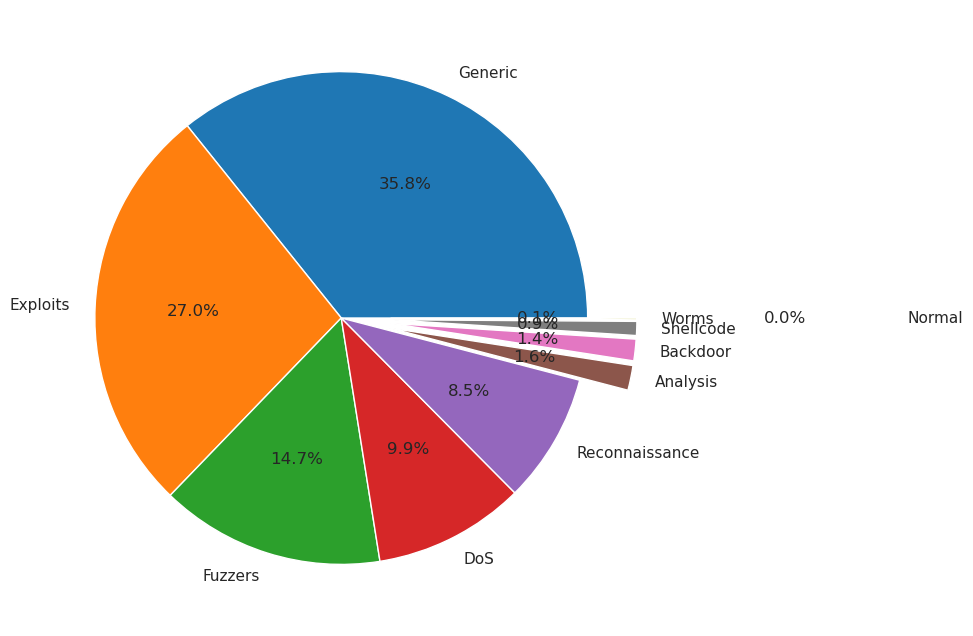

In [13]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

* Generic and Exploits attacks are the most.

## Splitting data

In [14]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


## Decision Tree Model :
* Using a decision tree model to create a set of criteria for detecting cyber attacks. Conducting a grid search to optimize the model toward maximizing recall. Recall rate should be high to create the first layer of protection.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [16]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


## Visualizing the rules

:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



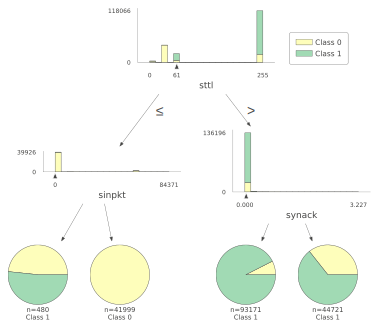

In [17]:
from sklearn.tree import export_text
import dtreeviz

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()

* From the decision tree, we visualized the rule of tree as sttl<=61 and sttl>61

## Filtering data for potential attacks

In [18]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


* The rule based system filtered 23% of network traffic for further analysis, demonstrating its efficacy in detecting non-threatening network activity. Now, we will detect cyber attacks by applying the trained model to the filtered test data.

In [19]:
from sklearn.metrics import accuracy_score, precision_score

In [20]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test_2)
    
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)
    
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()
    
    return {'Recall' : recall}

In [21]:
results = {}

## Random Forest Model

Recall:  0.9571815389589395
Precision:  0.9647257693326001
Accuracy:  0.9351956247370635


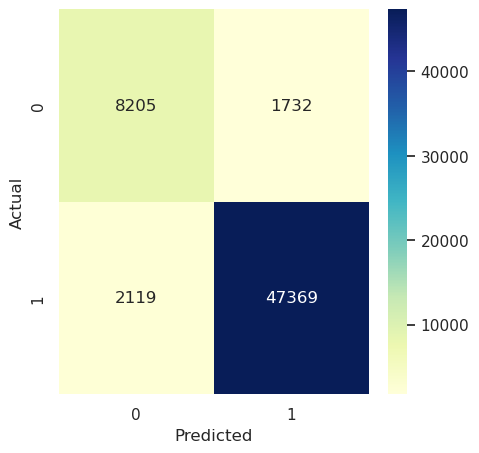

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

## Visualizing the rules present in the tree

In [23]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- dpkts <= 0.50
|   |--- ct_srv_src <= 2.50
|   |   |--- sbytes <= 53.00
|   |   |   |--- sinpkt <= 30000.02
|   |   |   |   |--- sbytes <= 26.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  26.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- sinpkt >  30000.02
|   |   |   |   |--- class: 0.0
|   |   |--- sbytes >  53.00
|   |   |   |--- rate <= 0.11
|   |   |   |   |--- sbytes <= 62.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  62.50
|   |   |   |   |   |--- sttl <= 143.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- sttl >  143.00
|   |   |   |   |   |   |--- ct_src_dport_ltm <= 1.50
|   |   |   |   |   |   |   |--- sinpkt <= 5037.05
|   |   |   |   |   |   |   |   |--- ct_srv_dst <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- ct_srv_dst >  1.50
|   |   |   |   |   |   |   |   |   |--- sbytes <= 803.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
| 

Recall:  0.9512811186550275
Precision:  0.9661378701746465
Accuracy:  0.9316617585191418


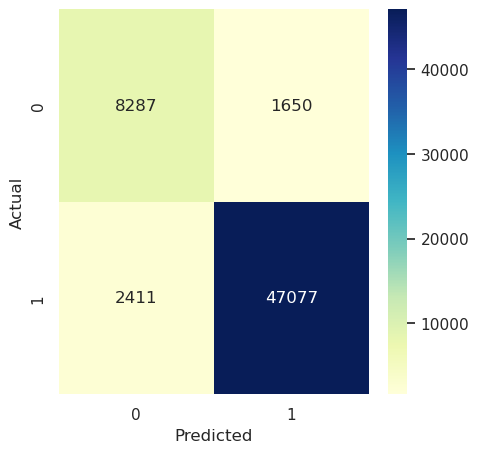

In [24]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

results['XGBoost Classifier'] = model_evaluation(xgbc)

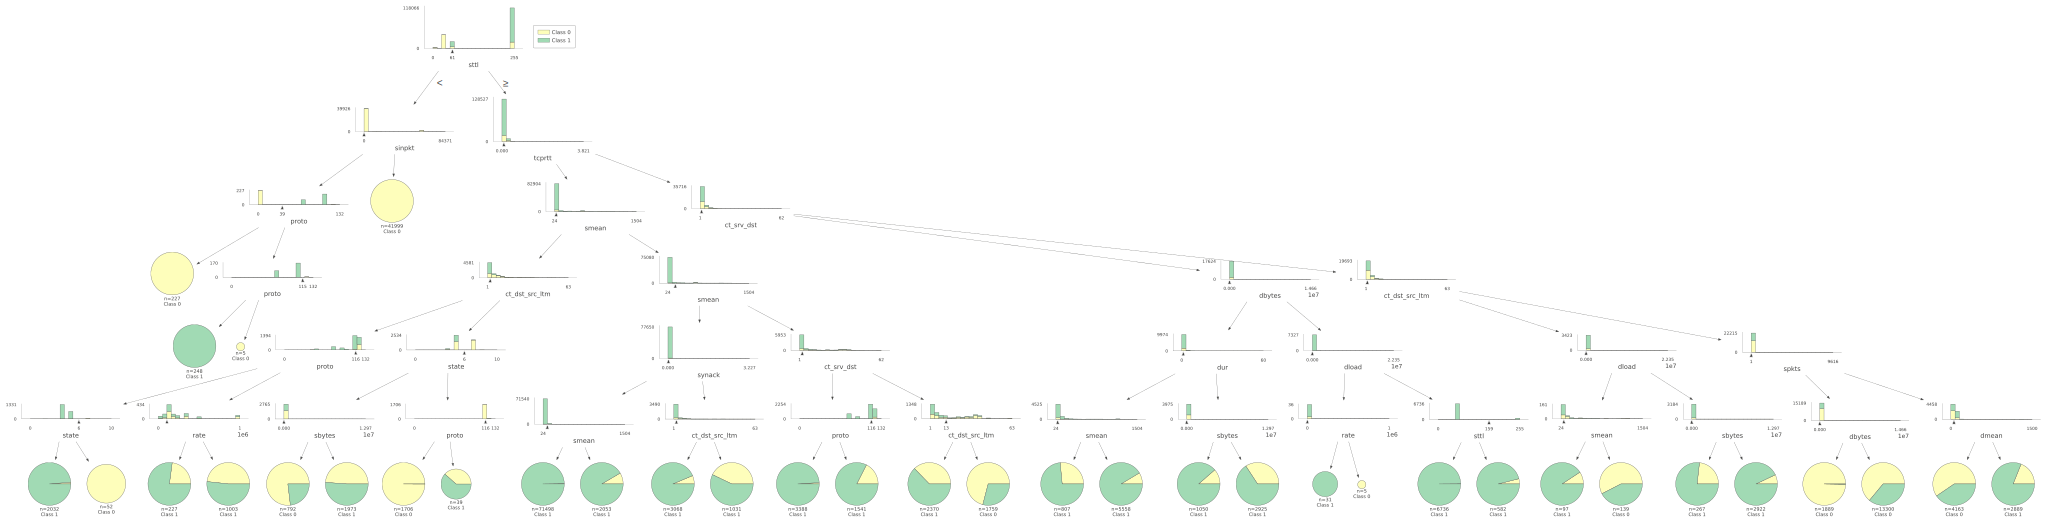

In [25]:
viz_model = dtreeviz.model(xgbc,tree_index=1,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()

Recall:  0.9465122858066602
Precision:  0.964898547739211
Accuracy:  0.9267816575515355


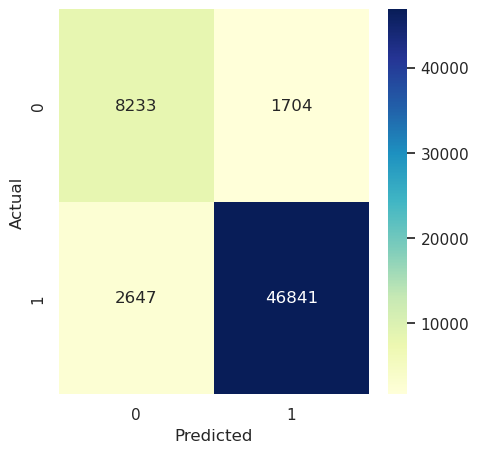

In [26]:
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier()

results['Light GBM Classifier'] = model_evaluation(lgbc)

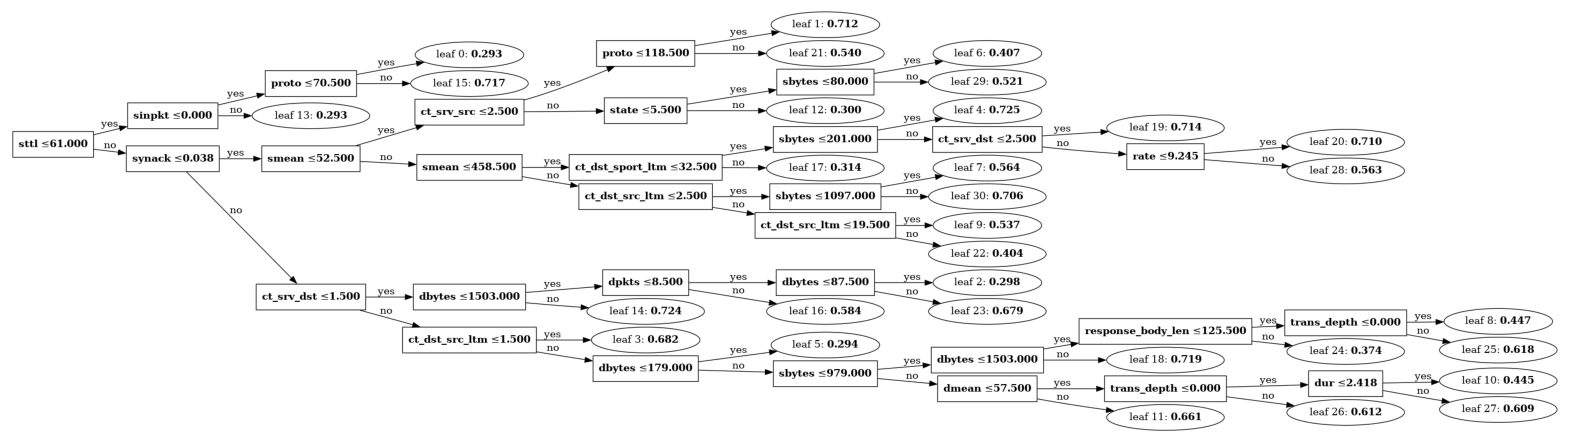

In [27]:
import lightgbm

lightgbm.plot_tree(lgbc,figsize = (20,12))
plt.show()

In [28]:
comparision = pd.DataFrame(results)
comparision

,Random Forest Model,XGBoost Classifier,Light GBM Classifier
Recall,0.957182,0.951281,0.946512


## Hypothesis testing:
#### Wilcoxon rank sum test:
* The Wilcoxon rank sum test is a non-parametric test, which means that it does not assume that the data is normally distributed. The Wilcoxon rank sum test will calculate a Z-statistic and a p-value. The Z-statistic is a measure of how much variation there is between the three recall scores. The p-value is a measure of the probability of getting a result as extreme as the one observed, if the null hypothesis is true. The null hypothesis is the hypothesis that there is no difference in the recall of the three models. If the p-value is less than 0.05, then we can reject the null hypothesis and conclude that there is a statistically significant difference in the recall of the three models.  

In [29]:
from scipy.stats import wilcoxon

z_statistic, p_value = wilcoxon([comparision.iloc[0][0], comparision.iloc[0][1], comparision.iloc[0][2]])

# Print the results
print('Z-statistic:', z_statistic)
print('p-value:', p_value)

# Interpret the results
if p_value < 0.05:
    print('The difference in the recall of the three models is statistically significant.')
else:
    print('The difference in the recall of the three models is not statistically significant.')


Z-statistic: 0.0
p-value: 0.25
The difference in the recall of the three models is not statistically significant.


* Any of the three models can be applied to identify the important features to predict the cyber attacks.

## Correlations

* To improve our understanding of the variables involved in cyber attack detection, we need to analyze the network data. Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with cyber attacks. Additionally, random forest models can help identify the importance of different features in predicting the target variable (cyber attacks). We can compare the feature rankings from the random forest with the results of the correlation analysis to gain a better understanding of the key features to focus on for effective cyber attack detection.

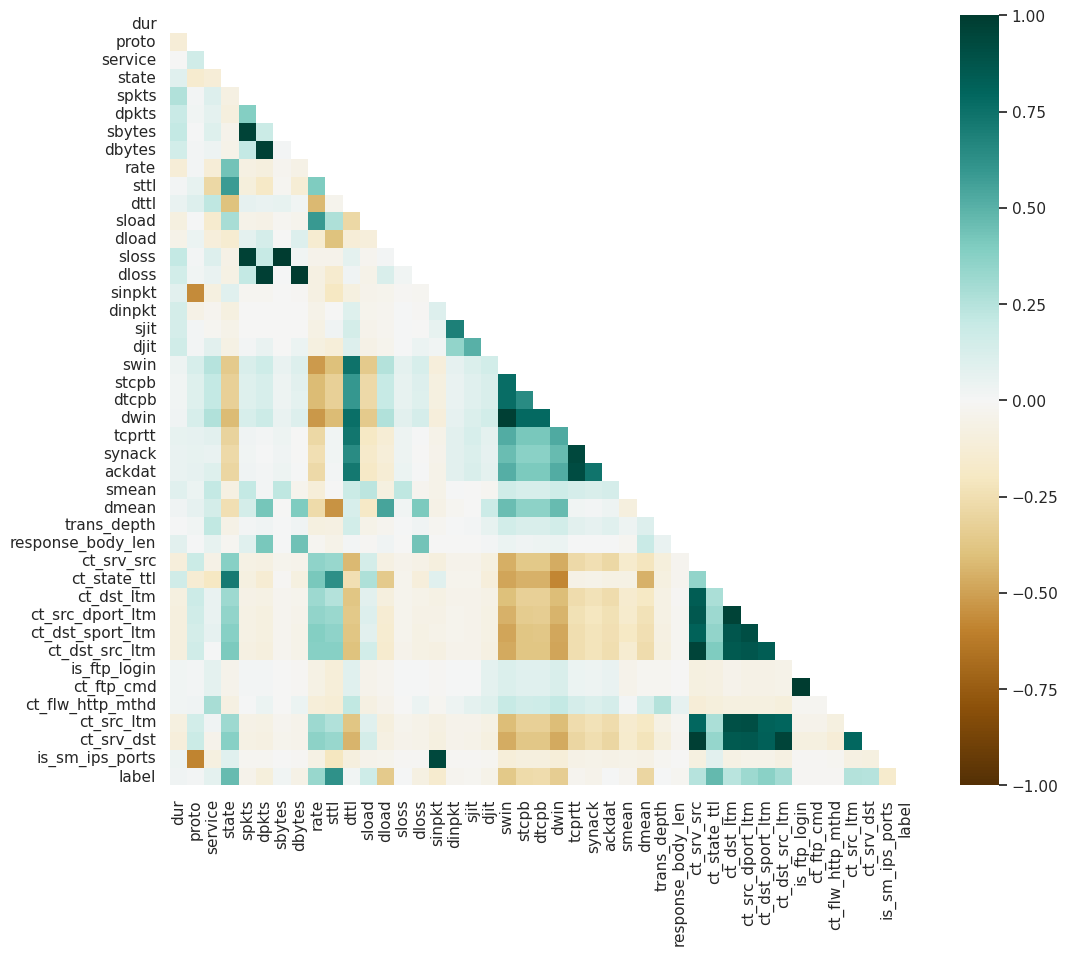

In [30]:
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)
plt.show()

### Correlation of variables with cyber attack (label)

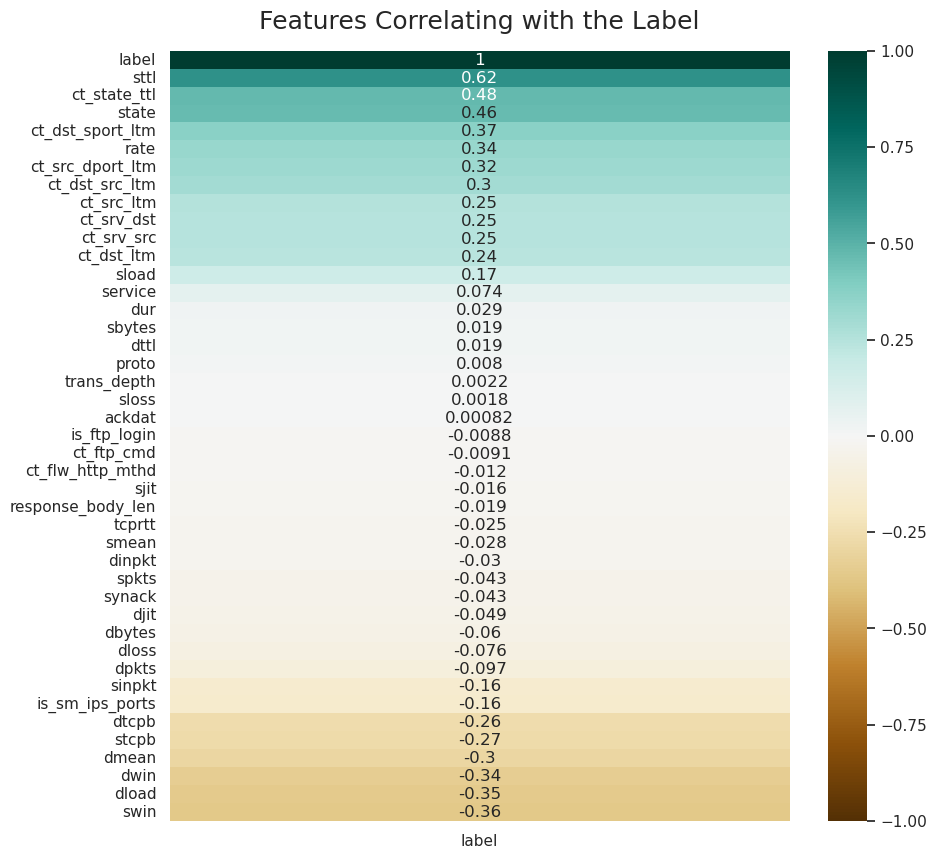

In [31]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(df.corr()[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)
plt.show()

### The following variables are positively correlated with cyber attacks:

* sttl: Source to destination time to live value.
* ct_state_ttl and state: These features reflect various stages of TCP connections and may be related to port scanning, SYN flood, or DDoS attacks.
* ct_dst_sport_ltm: This feature measures the number of connections from the same source IP to the same destination port in a short time period.
* rate: This feature may represent various types of traffic rates or frequencies. 

### The following variables are negatively correlated with cyber attacks:

* swin
* dload

## Feature Ranking from Random Forest

In [32]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.127183
1,ct_state_ttl,0.098745
2,rate,0.056321
3,dload,0.049838
4,sload,0.045773
5,sbytes,0.043195
6,ct_srv_dst,0.040537
7,smean,0.039754
8,ct_dst_src_ltm,0.038934
9,tcprtt,0.033016


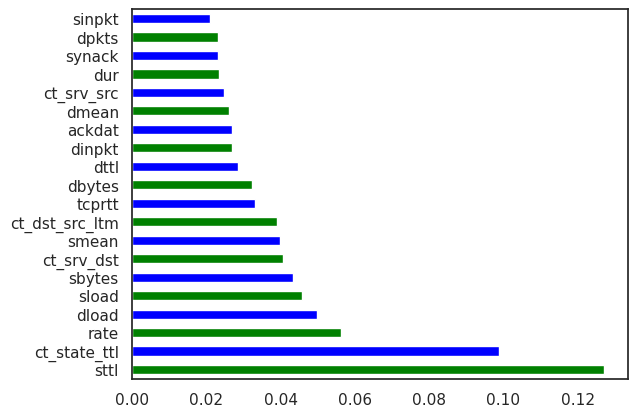

In [33]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)
plt.show()

### Let's select only the top 10 features and find their associations with the type of cyber attack.


In [34]:
top10= feature_imp.Name[:10].tolist()
top10

['sttl',
 'ct_state_ttl',
 'rate',
 'dload',
 'sload',
 'sbytes',
 'ct_srv_dst',
 'smean',
 'ct_dst_src_ltm',
 'tcprtt']

In [35]:
X = df[top10]
y = df['label'].values

rf_top10 = RandomForestClassifier(random_state=11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf_top10.fit(X_train, y_train)

y_pred = rf_top10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
 

Accuracy:  0.9443869498848672


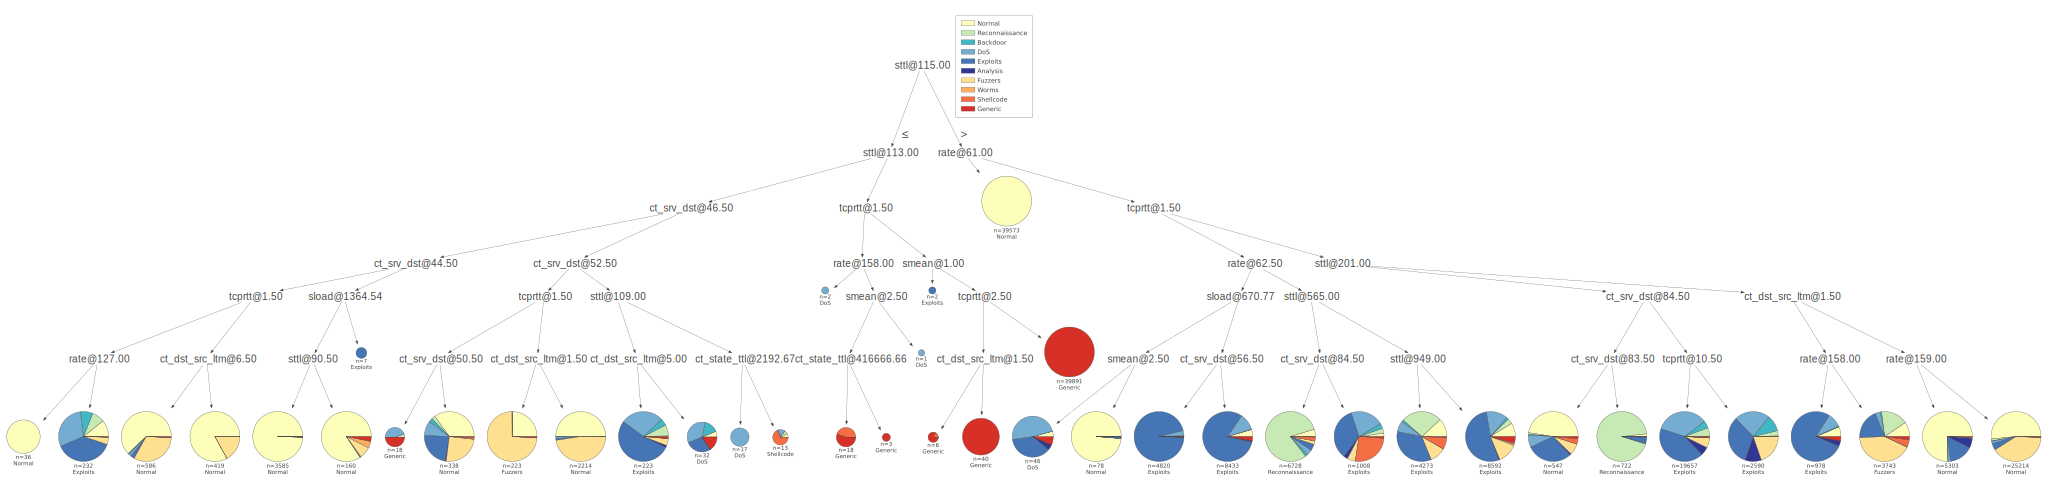

In [36]:

top10= feature_imp.Name[:10].tolist()

attack_names = np.array(df['attack_cat'].unique())

X_top = df.loc[:, df.columns.isin(top10)]
y_top = pd.factorize(df['attack_cat'])[0]


clf_top10 = DecisionTreeClassifier(max_depth=6)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

clf_top10.fit(X_train_top, y_train_top)

viz_model = dtreeviz.model(clf_top10,
                           X_train=X_train_top, y_train=y_train_top, 
                           class_names=attack_names,
                           feature_names=top10)

viz_model.view(fancy=False,scale=1) 

## Random Forest With Attack Category As the Prediction Labels


Accuracy:  0.8243253732115599


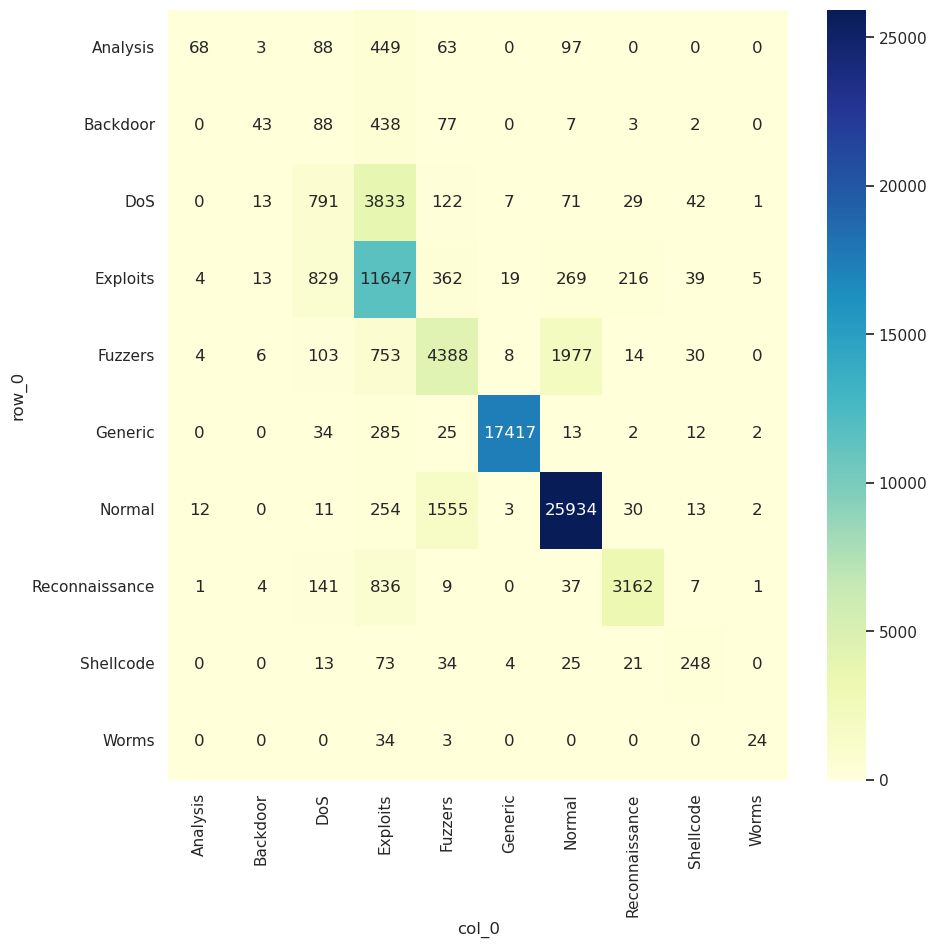

In [37]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(random_state=11,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

      Analysis       0.76      0.09      0.16       768
      Backdoor       0.52      0.07      0.12       658
           DoS       0.38      0.16      0.23      4909
      Exploits       0.63      0.87      0.73     13403
       Fuzzers       0.66      0.60      0.63      7283
       Generic       1.00      0.98      0.99     17790
        Normal       0.91      0.93      0.92     27814
Reconnaissance       0.91      0.75      0.82      4198
     Shellcode       0.63      0.59      0.61       418
         Worms       0.69      0.39      0.50        61

      accuracy                           0.82     77302
     macro avg       0.71      0.54      0.57     77302
  weighted avg       0.82      0.82      0.81     77302



* Generic, Normal, and Exploits attacks have high recalls.

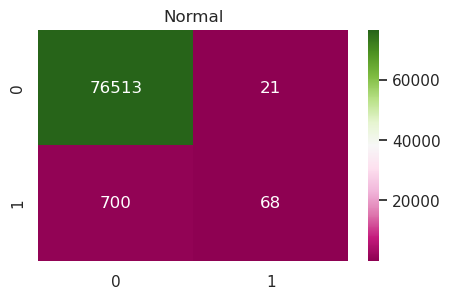

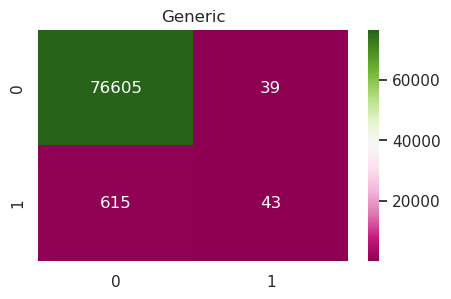

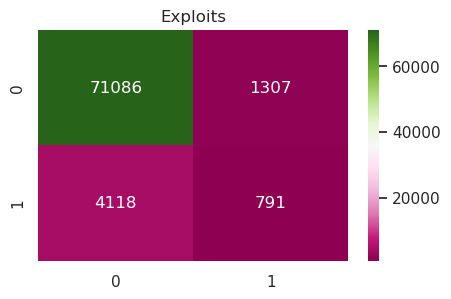

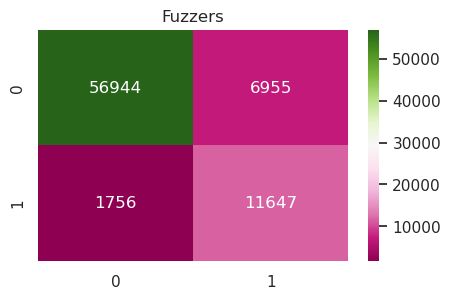

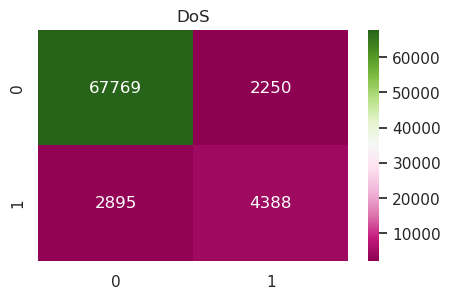

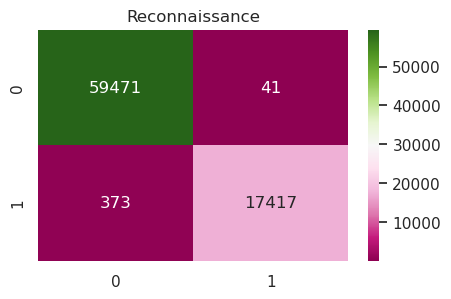

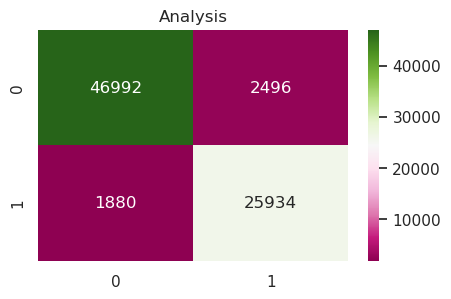

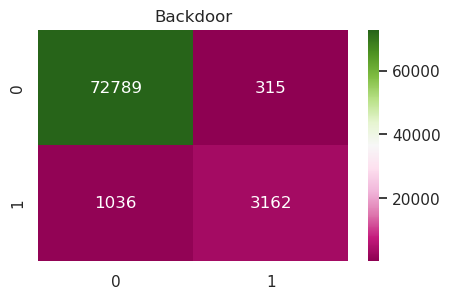

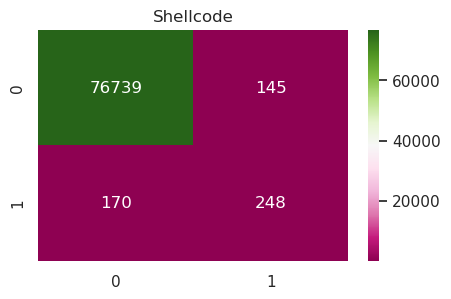

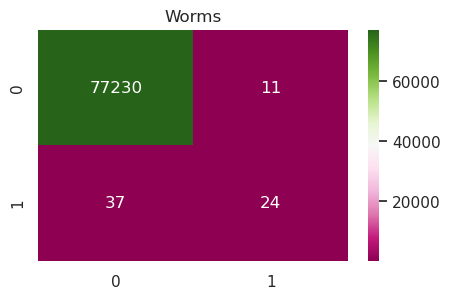

In [39]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test,y_pred)
for i,j in zip(mcm,df['attack_cat'].value_counts().index):
    plt.subplots(figsize = (5,3))
    sns.heatmap(i,annot=True,fmt = 'd',cmap = "PiYG")
    plt.title(j)

* Fuzzers, Reconaissance, and Analysis has true negatives and false negatives.

## Conclusion

* The Random Forest Model is best for cyber attack detection.
* Decision Tree Model was used to identify the rules of cyber attack detection.
* From this analysis, most important features were identified which has major role in cyber attack detection.
* Random Forest Model is performing well in accuracy with both dependent feature, label and attack category.